# Character Recognition Method


Confidence: 95.99999785423279%

['The', 'narrotor', 'sold', 'the', 'drawing', 'for', 'fifty', 'pounds', '.', 'He', 'had', 'bought', 'it', 'for', 'ten', 'shillings', '.']


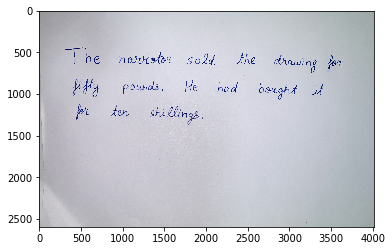

In [57]:
import os 
import io 
from google.cloud import vision 
from matplotlib import pyplot as plt 

creds_file = 'myapikey.json'
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('myapikey.json')

client = vision.ImageAnnotatorClient(credentials = credentials)

f = 'pages/IMG_2392.jpg'
with io.open(f, 'rb') as image: 
    content = image.read()

image = vision.types.Image(content = content) 
response = client.document_text_detection(image = image) 

a = plt.imread(f) 
plt.imshow(a) 

txt = [] 
for page in response.full_text_annotation.pages: 
        for block in page.blocks: 
            print('\nConfidence: {}%\n'.format(block.confidence * 100)) 
            for paragraph in block.paragraphs: 

                for word in paragraph.words: 
                    word_text = ''.join([symbol.text for symbol in word.symbols]) 
                    txt.append(word_text) 

print(txt) 


In [58]:
print(txt)

['The', 'narrotor', 'sold', 'the', 'drawing', 'for', 'fifty', 'pounds', '.', 'He', 'had', 'bought', 'it', 'for', 'ten', 'shillings', '.']


# Answer from the answer key

In [59]:
text1 = "The narrator sold the drawing for fifty pounds. He had bought it for ten shillings. He got a good profit of forty nine pounds ten."

# Removing Stop Words 

In [61]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english')) 

word_tokens1 = word_tokenize(text1) 

filtered_sentence1 = [w for w in word_tokens1 if not w in stop_words] 

filtered_sentence1 = [] 

for w in word_tokens1: 
    if w not in stop_words: 
        filtered_sentence1.append(w) 
        

filtered_sentence2 = txt 



#print(word_tokens) 
print(filtered_sentence1) 
print(filtered_sentence2) 



['The', 'narrator', 'sold', 'drawing', 'fifty', 'pounds', '.', 'He', 'bought', 'ten', 'shillings', '.', 'He', 'got', 'good', 'profit', 'forty', 'nine', 'pounds', 'ten', '.']
['The', 'narrotor', 'sold', 'the', 'drawing', 'for', 'fifty', 'pounds', '.', 'He', 'had', 'bought', 'it', 'for', 'ten', 'shillings', '.']


# Matching the Keywords 

In [66]:
filtered_sentence1.remove('.') 


In [63]:
filtered_sentence2.remove('.')

In [67]:
print(filtered_sentence1)
print(filtered_sentence2)

['The', 'narrator', 'sold', 'drawing', 'fifty', 'pounds', 'He', 'bought', 'ten', 'shillings', 'He', 'got', 'good', 'profit', 'forty', 'nine', 'pounds', 'ten']
['The', 'narrotor', 'sold', 'the', 'drawing', 'for', 'fifty', 'pounds', 'He', 'had', 'bought', 'it', 'for', 'ten', 'shillings']


In [69]:
print(filtered_sentence1)
print(filtered_sentence2)

['The', 'narrator', 'sold', 'drawing', 'fifty', 'pounds', 'He', 'bought', 'ten', 'shillings', 'He', 'got', 'good', 'profit', 'forty', 'nine', 'pounds', 'ten']
['The', 'narrotor', 'sold', 'the', 'drawing', 'for', 'fifty', 'pounds', 'He', 'had', 'bought', 'it', 'for', 'ten', 'shillings']


In [73]:
match = []
for item in filtered_sentence1:
    for item1 in filtered_sentence2:
        if item == item1:
            print (item)
            match.append(item)

print ("****************\n")

The
sold
drawing
fifty
pounds
He
bought
ten
shillings
He
pounds
ten
****************



In [78]:
print(len(match))

12


In [81]:
print(len(filtered_sentence1))
print(len(match))

18
12


# Evaluating Sentence 

In [80]:
#filtered_sentence1 (Solution sentence)
#filtered_sentence2 (Answer by user)

marks = (len(match)/len(filtered_sentence1))*3
print(marks)

2.0


# Plots

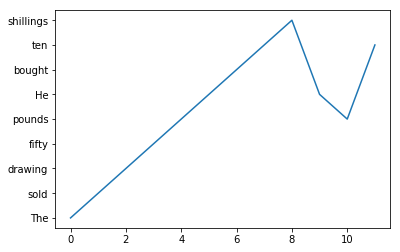

In [90]:
plt.plot(match)
plt.show()

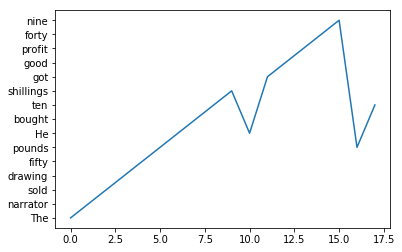

In [87]:
plt.plot(filtered_sentence1)
plt.show()

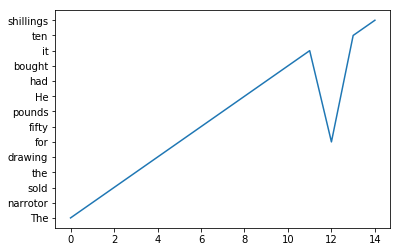

In [88]:
plt.plot(filtered_sentence2)
plt.show()

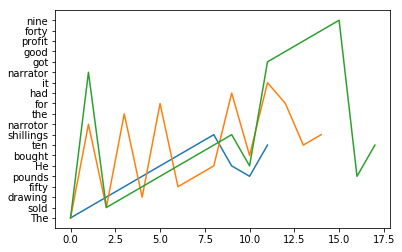

In [89]:
plt.plot(match)
plt.plot(filtered_sentence2)
plt.plot(filtered_sentence1)

plt.show()